# Importing Libraries

In [149]:
import praw
import pandas as pd
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# Load the dataset

In [150]:
# Initialize Reddit instance
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="NkR2_4ZvcUgome9qE8XvdQ",
    client_secret="oMvK9a5zyB_V-npDHPfw09kD3U_3jg",
    user_agent=user_agent
)

In [151]:
# Scraping Reddit data
headlines = []
for submission in reddit.subreddit("Nasdaq").hot(limit=None):
    headlines.append(submission.title)

# Print out the scraped headlines
for headline in headlines:
    print(headline)

(NDAQ: $AGBA)
(NDAQ: $AGBA) ~ 1.00 short term target/ 3.00 long term ... breakout into .50++ coming fast..
$AGBA~ 2 US acquisitions pending press.. updated chart
$AGBA~ 2 US acquisitions pending press..
What could be next Tech Multibagger
(NDAQ: $AGBA) ~ Pending press on 2 US Acquisitions. AGBA expending footprint in USA
(NDAQ: $AGBA) ~ Pending press on 2 US Acquisitions. AGBA expending footprint in USA
(NDAQ: $AGBA)~ press pending....
RIVN Rivian Automotive stock
Robinhood's Resurgence: A Profitable Pivot and Promising Growth for NASDAQ:HOOD by DEXWireNews
(NDAQ: $AGBA)
(NDAQ: $AGBA)
$CAUD Collective Audience Appoints AdTech Executive, Inventor and Venture Investor, Joe Zawadzki, as Chairman
Nvidia surpasses Amazon in market value.
Dyadic and Cygnus Technologies Announce Partnership To Provide C1 HCP ELISA Assay to Enhance Quality Assurance in Biomanufacturing
GDHG Golden Heaven Group Holdings Ltd. Announces the Trial Operation of Seven Rainbow Park
Trimble (NASDAQ: $TRMB) Reports Sol

# Removing Stopwords Using Regex

In [152]:
# Function to remove stopwords using regex
def remove_stopwords_regex(text):
    stop_words = r'\b(?:' + '|'.join(stopwords.words('english')) + r')\b'
    return re.sub(stop_words, '', text)

# Example usage:
text = "This is a sample sentence with some stopwords that we want to remove."
clean_text = remove_stopwords_regex(text)
print(clean_text)

This   sample sentence   stopwords   want  remove.


In [153]:
# Remove stopwords using regex
headlines_without_stopwords = [remove_stopwords_regex(title.lower()) for title in headlines]

# Displaying text before and after removing stopwords
print("Text before removing stopwords:")
print(headlines[:5])  # Displaying first 5 submission titles
print("\nText after removing stopwords:")
print(headlines_without_stopwords[:5])  # Displaying first 5 submission titles without stopwords

Text before removing stopwords:
['(NDAQ: $AGBA)', '(NDAQ: $AGBA) ~ 1.00 short term target/ 3.00 long term ... breakout into .50++ coming fast..', '$AGBA~ 2 US acquisitions pending press.. updated chart', '$AGBA~ 2 US acquisitions pending press..', 'What could be next Tech Multibagger']

Text after removing stopwords:
['(ndaq: $agba)', '(ndaq: $agba) ~ 1.00 short term target/ 3.00 long term ... breakout  .50++ coming fast..', '$agba~ 2 us acquisitions pending press.. updated chart', '$agba~ 2 us acquisitions pending press..', ' could  next tech multibagger']


# Creating Dataframe

In [183]:
# Create DataFrame
Nasdaq_df = pd.DataFrame({'Title':headlines, 'Title_Without_Stopwords': headlines_without_stopwords})

In [184]:
# Display the first few rows of the DataFrame
Nasdaq_df.head(50)

,Title,Title_Without_Stopwords
0,(NDAQ: $AGBA),(ndaq: $agba)
1,(NDAQ: $AGBA) ~ 1.00 short term target/ 3.00 l...,(ndaq: $agba) ~ 1.00 short term target/ 3.00 l...
2,$AGBA~ 2 US acquisitions pending press.. updat...,$agba~ 2 us acquisitions pending press.. updat...
3,$AGBA~ 2 US acquisitions pending press..,$agba~ 2 us acquisitions pending press..
4,What could be next Tech Multibagger,could next tech multibagger
5,(NDAQ: $AGBA) ~ Pending press on 2 US Acquisit...,(ndaq: $agba) ~ pending press 2 us acquisitio...
6,(NDAQ: $AGBA) ~ Pending press on 2 US Acquisit...,(ndaq: $agba) ~ pending press 2 us acquisitio...
7,(NDAQ: $AGBA)~ press pending....,(ndaq: $agba)~ press pending....
8,RIVN Rivian Automotive stock,rivn rivian automotive stock
9,Robinhood's Resurgence: A Profitable Pivot and...,robinhood' resurgence: profitable pivot prom...


In [186]:
# Display the columns
Nasdaq_df

,Title,Title_Without_Stopwords
0,(NDAQ: $AGBA),(ndaq: $agba)
1,(NDAQ: $AGBA) ~ 1.00 short term target/ 3.00 l...,(ndaq: $agba) ~ 1.00 short term target/ 3.00 l...
2,$AGBA~ 2 US acquisitions pending press.. updat...,$agba~ 2 us acquisitions pending press.. updat...
3,$AGBA~ 2 US acquisitions pending press..,$agba~ 2 us acquisitions pending press..
4,What could be next Tech Multibagger,could next tech multibagger
...,...,...
960,4000% GAINS $$$ 🔥🚀 PENNY STOCKS TO BUY NOW 📈,4000% gains $$$ 🔥🚀 penny stocks buy 📈
961,#Nasdaq,#nasdaq
962,#Nasdaq,#nasdaq
963,#Nasdaq,#nasdaq


In [179]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(Nasdaq_df.describe())


Descriptive Statistics:
          Title Title_Without_Stopwords
count       965                     965
unique      922                     922
top     #Nasdaq                 #nasdaq
freq          8                       8


In [180]:
# Count of unique values for categorical features
categorical_counts = Nasdaq_df['Title_Without_Stopwords'].value_counts()
print(categorical_counts)

Title_Without_Stopwords
#nasdaq                                                                                 8
nvda nvidia stock                                                                       4
microsoft' astonishing transformation   tech titan  nasdaq:msft  dexwirenews            4
$amd advanced micro devices stock                                                       4
(ndaq: $agba)                                                                           3
                                                                                       ..
kaival brands  present  ld micro main event xvi                                         1
arm holdings ipo review: '  buy?                                                        1
nasdaq trend analysis  h4 timeframe https://chat.whatsapp.com/lvmfhjinzib6wpnbwwpoco    1
nasdaq trend analysis  h4 timeframe                                                     1
4000% gains $$$ 🔥🚀 penny stocks  buy  📈                                     

# Statistical Operations and Plots

In [181]:
# Word frequency analysis
word_vectorizer = CountVectorizer()
word_vectorizer.fit(headlines_without_stopwords)
word_freq = word_vectorizer.transform(headlines_without_stopwords)
word_freq_df = pd.DataFrame(word_freq.toarray(), columns=word_vectorizer.get_feature_names_out())

print(word_freq_df)

     00  000  03  05  10  100  1000  100k  11  110  ...  zacks  zawadzki  \
0     0    0   0   0   0    0     0     0   0    0  ...      0         0   
1     2    0   0   0   0    0     0     0   0    0  ...      0         0   
2     0    0   0   0   0    0     0     0   0    0  ...      0         0   
3     0    0   0   0   0    0     0     0   0    0  ...      0         0   
4     0    0   0   0   0    0     0     0   0    0  ...      0         0   
..   ..  ...  ..  ..  ..  ...   ...   ...  ..  ...  ...    ...       ...   
960   0    0   0   0   0    0     0     0   0    0  ...      0         0   
961   0    0   0   0   0    0     0     0   0    0  ...      0         0   
962   0    0   0   0   0    0     0     0   0    0  ...      0         0   
963   0    0   0   0   0    0     0     0   0    0  ...      0         0   
964   0    0   0   0   0    0     0     0   0    0  ...      0         0   

     zealand  zenadrone  zero  zs  zscaler  zyme  zymeworks  zynex  
0          0      

## Bar Plot

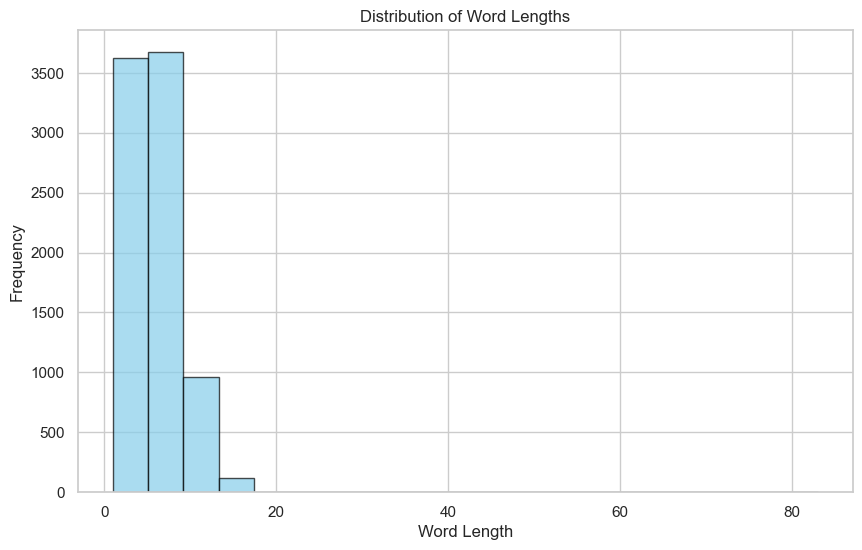

In [158]:
# Bar plot between Word length and Frequency 
word_lengths = [len(word) for title in headlines_without_stopwords for word in title.split()]
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

## Box Plot

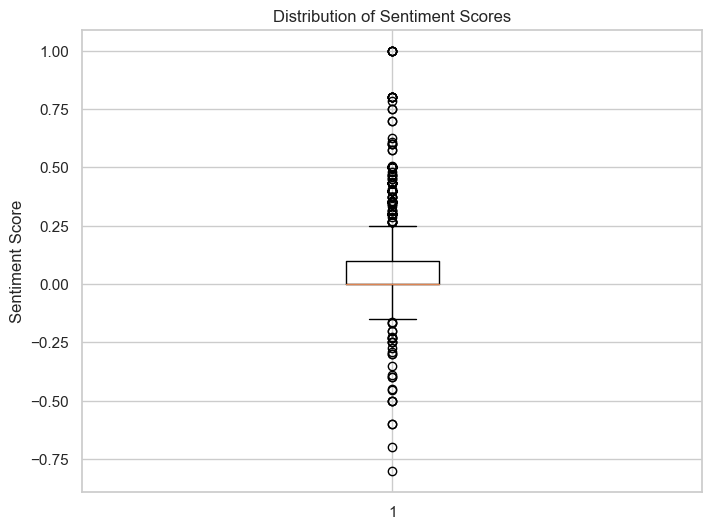

In [159]:
# Box plot of sentiment scores
sentiment_scores = [TextBlob(title).sentiment.polarity for title in headlines_without_stopwords]
plt.figure(figsize=(8, 6))
plt.boxplot(sentiment_scores)
plt.title('Distribution of Sentiment Scores')
plt.ylabel('Sentiment Score')
plt.show()

## Scatter Plot

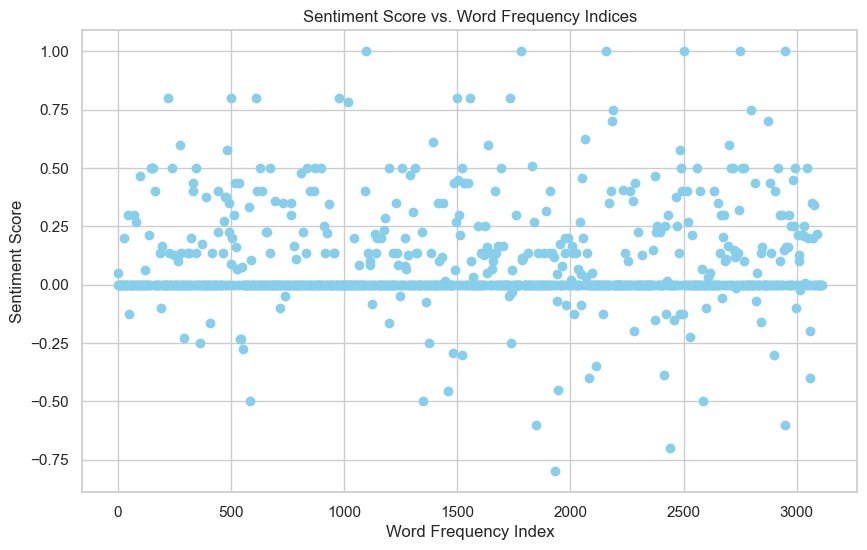

In [160]:
# Downsampling the word frequency indices array to match the length of sentiment scores array
word_freq_indices_downsampled = np.linspace(0, len(word_freq_df.sum()) - 1, len(sentiment_scores), dtype=int)

# Scatter plot of sentiment scores vs. word frequency indices
plt.figure(figsize=(10, 6))
plt.scatter(word_freq_indices_downsampled, sentiment_scores, color='skyblue')
plt.title('Sentiment Score vs. Word Frequency Indices')
plt.xlabel('Word Frequency Index')
plt.ylabel('Sentiment Score')
plt.show()

## Word Frequency Bar Plot

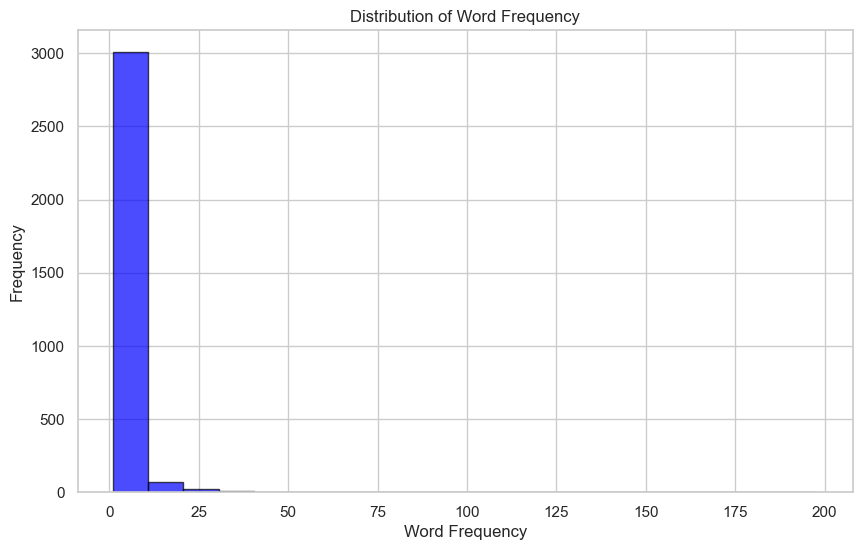

In [161]:
# Distribution plot of word frequency
plt.figure(figsize=(10, 6))
plt.hist(word_freq_df.sum(), bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Word Frequency')
plt.xlabel('Word Frequency')
plt.ylabel('Frequency')
plt.show()

## Wrd Frequency Box Plot

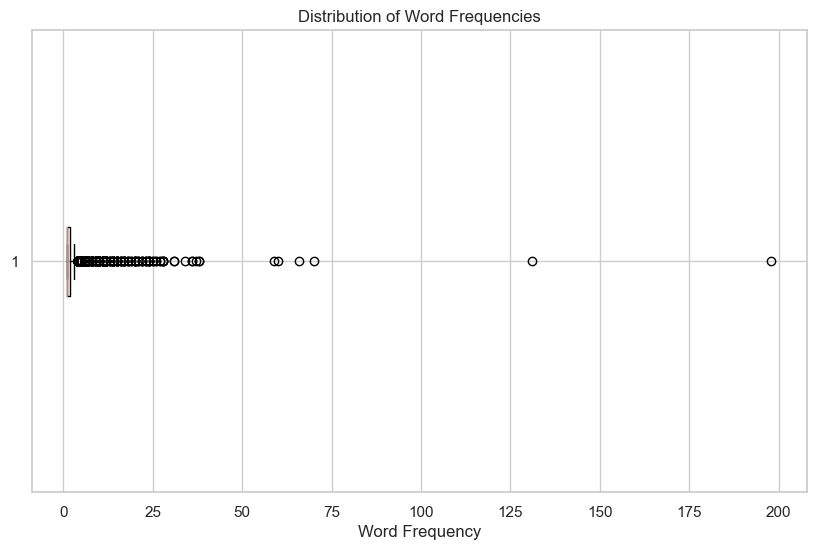

In [162]:
# Box plot of word frequencies
plt.figure(figsize=(10, 6))
plt.boxplot(word_freq_df.sum(), vert=False)
plt.title('Distribution of Word Frequencies')
plt.xlabel('Word Frequency')
plt.show()

## Bar Plot for top 20 words

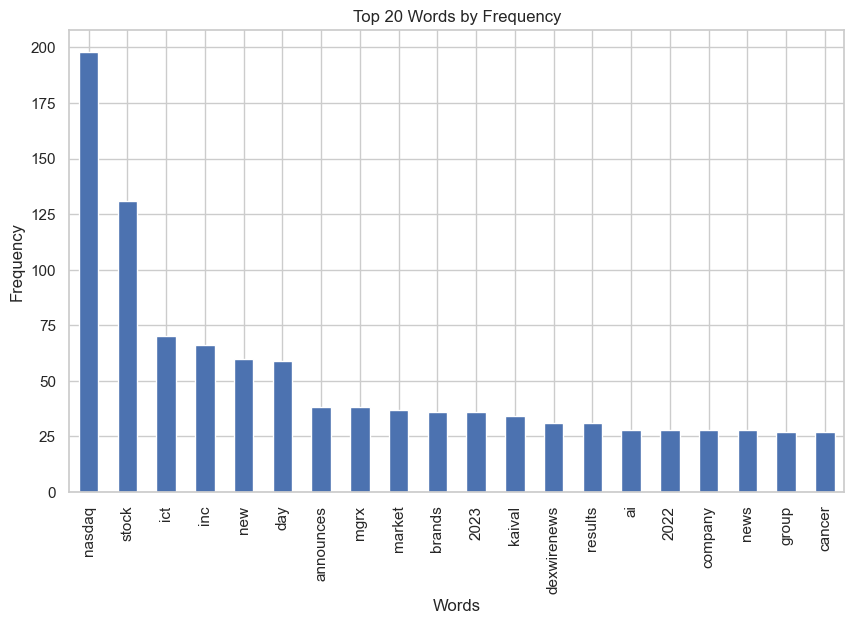

In [163]:
# Plotting top 20 words by frequency
word_freq_df.sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Words by Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Pipeline for Text Processing

In [164]:
# Pipeline for text processing
pipeline = Pipeline([
    ('remove_stopwords', CountVectorizer(stop_words='english')),
    ('word_freq_analysis', CountVectorizer()),
    ('word_cloud', WordCloud())
])

# Wordcloud

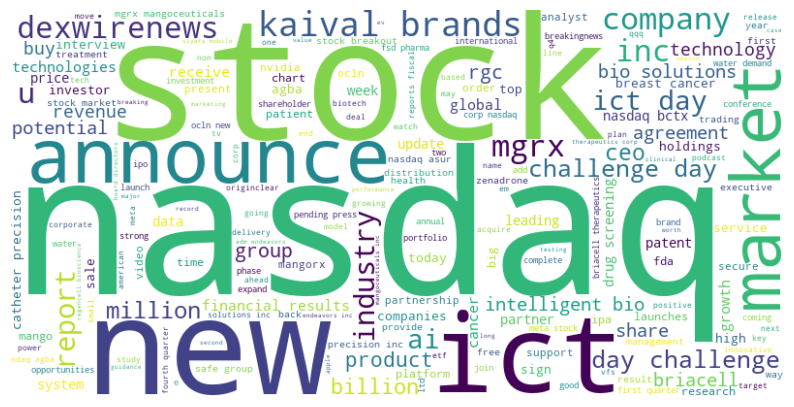

In [165]:
# Join headlines without stopwords into a single string
text_without_stopwords_combined = ' '.join(headlines_without_stopwords)

# Creating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_without_stopwords_combined)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Optional: Turn off axis
plt.show()

# Regex For Different Strings

## Email addresses

In [166]:
email_regex = r'[\w\.-]+@[\w\.-]+'
email_example = "Please contact me at katlad@mail.sacredheart.edu for further information."
email_result = re.findall(email_regex, email_example)
print("Email:", email_result)

Email: ['katlad@mail.sacredheart.edu']


## Phone numbers

In [167]:
phone_regex = r'\(\d{3}\) \d{3}-\d{4}'
phone_example = "You can reach us at (203) 939-0939."
phone_result = re.findall(phone_regex, phone_example)
print("Phone:", phone_result)

Phone: ['(203) 939-0939']


## URLs

In [168]:
url_regex = r'https?://(?:www\.)?\w+\.\w+'
url_example = "Visit our website at https://www.sacredheart.com for more details."
url_result = re.findall(url_regex, url_example)
print("URL:", url_result)

URL: ['https://www.sacredheart.com']


## Numeric values with commas

In [169]:
numeric_regex = r'\d{1,3}(,\d{3})*\.\d+'
numeric_example = "The total amount is 0,939.56 dollars."
numeric_result = re.findall(numeric_regex, numeric_example)
print("Numeric value:", numeric_result)

Numeric value: [',939']


## File paths

In [170]:
file_regex = r'\/[\w\/]+\.\w+'
file_example = "The file can be found at /home/user/Text_Based_Analysis.txt."
file_result = re.findall(file_regex, file_example)
print("File path:", file_result)

File path: ['/home/user/Text_Based_Analysis.txt']


# Sentiment Analysis

In [187]:
# Function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Add Subjectivity and Polarity columns to the Nasdaq DataFrame
Nasdaq_df['Subjectivity'] = Nasdaq_df['Title_Without_Stopwords'].apply(getSubjectivity)
Nasdaq_df['Polarity'] = Nasdaq_df['Title_Without_Stopwords'].apply(getPolarity)

# Display the Nasdaq DataFrame with the new columns
Nasdaq_df.head(50)

,Title,Title_Without_Stopwords,Subjectivity,Polarity
0,(NDAQ: $AGBA),(ndaq: $agba),0.000000,0.000000
1,(NDAQ: $AGBA) ~ 1.00 short term target/ 3.00 l...,(ndaq: $agba) ~ 1.00 short term target/ 3.00 l...,0.433333,0.050000
2,$AGBA~ 2 US acquisitions pending press.. updat...,$agba~ 2 us acquisitions pending press.. updat...,0.000000,0.000000
3,$AGBA~ 2 US acquisitions pending press..,$agba~ 2 us acquisitions pending press..,0.000000,0.000000
4,What could be next Tech Multibagger,could next tech multibagger,0.000000,0.000000
5,(NDAQ: $AGBA) ~ Pending press on 2 US Acquisit...,(ndaq: $agba) ~ pending press 2 us acquisitio...,0.000000,0.000000
6,(NDAQ: $AGBA) ~ Pending press on 2 US Acquisit...,(ndaq: $agba) ~ pending press 2 us acquisitio...,0.000000,0.000000
7,(NDAQ: $AGBA)~ press pending....,(ndaq: $agba)~ press pending....,0.000000,0.000000
8,RIVN Rivian Automotive stock,rivn rivian automotive stock,0.000000,0.000000
9,Robinhood's Resurgence: A Profitable Pivot and...,robinhood' resurgence: profitable pivot prom...,0.500000,0.200000


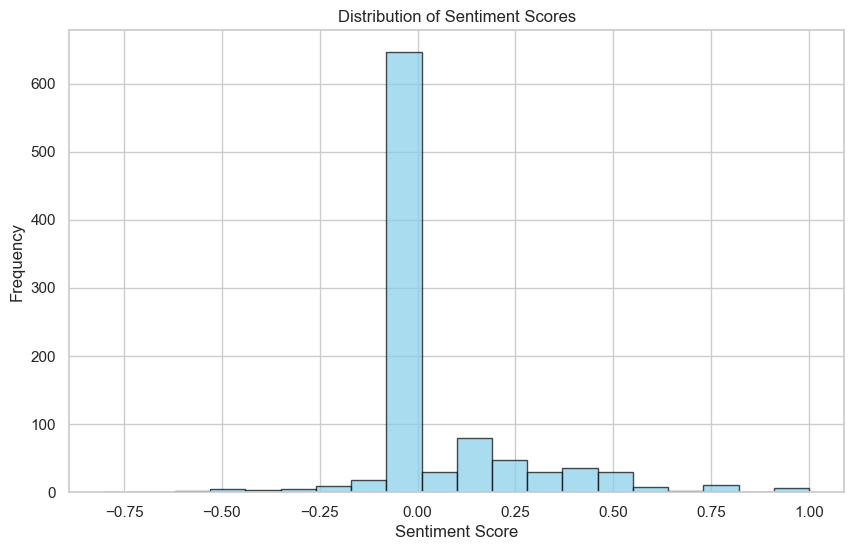

In [172]:
# Ploting of Sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [174]:
# Bing Liu score
bing_liu_score = blob.sentiment_assessments[1]  # Assuming subjectivity score is at index 1

# Displaying sentiment analysis results
print("Bing Liu Score:", bing_liu_score)

Bing Liu Score: 0.4058776333877558
